In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter as c
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
import pickle

In [2]:
data=pd.read_csv("D:\chronickidney\dataset\chronickidneydisease.csv")

In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data.columns.values

array(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
       'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn',
       'dm', 'cad', 'appet', 'pe', 'ane', 'classification'], dtype=object)

In [5]:
data.shape

(400, 26)

In [6]:
data.drop(['id'],axis=1,inplace=True)

In [7]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [9]:
data.columns=['age','bloodpressure','specific_gravity','albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria','blood_glucose_random','blood_urea','serum_creatinine','sodium','pottasium','hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count','hypertension','diabetesmellitus','coronary_artery_disease','appetite','pedal_edema','anemia','class']

In [11]:
data.columns

Index(['age', 'bloodpressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'pottasium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [13]:
data.head()

,age,bloodpressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   bloodpressure            388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  pottasium                312 non-null    float64
 14  hemoglobin               3

In [15]:
data['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [16]:
data['class']=data['class'].replace("ckd\t","ckd")
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

Text(0.5, 1.0, 'target Class')

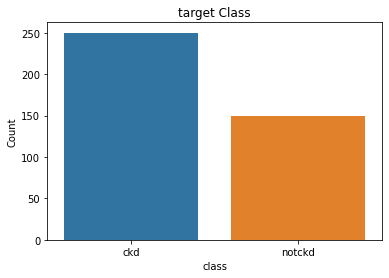

In [17]:
sns.countplot(x='class',data=data)
plt.xlabel("class")
plt.ylabel("Count")
plt.title("target Class")

In [18]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values)

In [19]:
print(catcols)

{'red_blood_cells', 'pus_cell_clumps', 'packed_cell_volume', 'class', 'pedal_edema', 'anemia', 'pus_cell', 'white_blood_cell_count', 'red_blood_cell_count', 'coronary_artery_disease', 'bacteria', 'diabetesmellitus', 'appetite', 'hypertension'}


In [20]:

for i in catcols:
    print("Columns:",i)
    print(c(data[i]))
   # print('*'*120+'\n')

Columns: red_blood_cells
Counter({'normal': 201, nan: 152, 'abnormal': 47})
Columns: pus_cell_clumps
Counter({'notpresent': 354, 'present': 42, nan: 4})
Columns: packed_cell_volume
Counter({nan: 70, '52': 21, '41': 21, '44': 19, '48': 19, '40': 16, '43': 14, '45': 13, '42': 13, '32': 12, '36': 12, '33': 12, '28': 12, '50': 12, '37': 11, '34': 11, '35': 9, '29': 9, '30': 9, '46': 9, '31': 8, '39': 7, '24': 7, '26': 6, '38': 5, '47': 4, '49': 4, '53': 4, '51': 4, '54': 4, '27': 3, '22': 3, '25': 3, '23': 2, '19': 2, '16': 1, '\t?': 1, '14': 1, '18': 1, '17': 1, '15': 1, '21': 1, '20': 1, '\t43': 1, '9': 1})
Columns: class
Counter({'ckd': 250, 'notckd': 150})
Columns: pedal_edema
Counter({'no': 323, 'yes': 76, nan: 1})
Columns: anemia
Counter({'no': 339, 'yes': 60, nan: 1})
Columns: pus_cell
Counter({'normal': 259, 'abnormal': 76, nan: 65})
Columns: white_blood_cell_count
Counter({nan: 105, '9800': 11, '6700': 10, '9600': 9, '9200': 9, '7200': 9, '6900': 8, '11000': 8, '5800': 8, '7800': 

In [21]:
catcols.remove('red_blood_cell_count')
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

{'red_blood_cells', 'pus_cell_clumps', 'class', 'pedal_edema', 'anemia', 'pus_cell', 'coronary_artery_disease', 'bacteria', 'diabetesmellitus', 'appetite', 'hypertension'}


In [22]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values)
print(catcols)

{'red_blood_cells', 'pus_cell_clumps', 'packed_cell_volume', 'class', 'pedal_edema', 'anemia', 'pus_cell', 'white_blood_cell_count', 'red_blood_cell_count', 'coronary_artery_disease', 'bacteria', 'diabetesmellitus', 'appetite', 'hypertension'}


In [23]:
for i in catcols:
    print("Columns:",i)
    print(c(data[i]))
    #print('*'*120+'\n')

Columns: red_blood_cells
Counter({'normal': 201, nan: 152, 'abnormal': 47})
Columns: pus_cell_clumps
Counter({'notpresent': 354, 'present': 42, nan: 4})
Columns: packed_cell_volume
Counter({nan: 70, '52': 21, '41': 21, '44': 19, '48': 19, '40': 16, '43': 14, '45': 13, '42': 13, '32': 12, '36': 12, '33': 12, '28': 12, '50': 12, '37': 11, '34': 11, '35': 9, '29': 9, '30': 9, '46': 9, '31': 8, '39': 7, '24': 7, '26': 6, '38': 5, '47': 4, '49': 4, '53': 4, '51': 4, '54': 4, '27': 3, '22': 3, '25': 3, '23': 2, '19': 2, '16': 1, '\t?': 1, '14': 1, '18': 1, '17': 1, '15': 1, '21': 1, '20': 1, '\t43': 1, '9': 1})
Columns: class
Counter({'ckd': 250, 'notckd': 150})
Columns: pedal_edema
Counter({'no': 323, 'yes': 76, nan: 1})
Columns: anemia
Counter({'no': 339, 'yes': 60, nan: 1})
Columns: pus_cell
Counter({'normal': 259, 'abnormal': 76, nan: 65})
Columns: white_blood_cell_count
Counter({nan: 105, '9800': 11, '6700': 10, '9600': 9, '9200': 9, '7200': 9, '6900': 8, '11000': 8, '5800': 8, '7800': 

In [24]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)
print(contcols)

{'specific_gravity', 'sugar', 'sodium', 'serum_creatinine', 'bloodpressure', 'hemoglobin', 'blood_glucose_random', 'albumin', 'age', 'blood_urea', 'pottasium'}


In [25]:
for i in contcols:
    print("countinous columns",i)
    print(c(data[i]))
    print('*'*120+'\n')

countinous columns specific_gravity
Counter({1.02: 106, 1.01: 84, 1.025: 81, 1.015: 75, 1.005: 7, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})
************************************************************************************************************************

countinous columns sugar
Counter({0.0: 290, 2.0: 18, 3.0: 14, 4.0: 13, 1.0: 13, 5.0: 3, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan

In [26]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')

In [27]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(catcols)

{'red_blood_cells', 'pus_cell_clumps', 'packed_cell_volume', 'class', 'pedal_edema', 'anemia', 'pus_cell', 'white_blood_cell_count', 'red_blood_cell_count', 'coronary_artery_disease', 'bacteria', 'diabetesmellitus', 'appetite', 'hypertension'}


In [28]:
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'red_blood_cells', 'pus_cell_clumps', 'specific_gravity', 'packed_cell_volume', 'class', 'sugar', 'pedal_edema', 'anemia', 'pus_cell', 'white_blood_cell_count', 'red_blood_cell_count', 'coronary_artery_disease', 'albumin', 'bacteria', 'diabetesmellitus', 'appetite', 'hypertension'}


In [29]:
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [30]:
data['diabetesmellitus']=data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes','yes':'yes'})
c(data['diabetesmellitus'])

Counter({'yes': 136, 'no': 261, ' yes': 1, nan: 2})

In [32]:
data.isnull().sum()

age                          9
bloodpressure               12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
pottasium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [33]:
data.packed_cell_volume=pd.to_numeric(data.packed_cell_volume,errors='coerce')
data.white_blood_cell_count=pd.to_numeric(data.white_blood_cell_count,errors='coerce')
data.red_blood_cell_count=pd.to_numeric(data.red_blood_cell_count,errors='coerce')

In [34]:
data.columns

Index(['age', 'bloodpressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'pottasium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [35]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['bloodpressure'].fillna(data['bloodpressure'].mean(),inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['pottasium'].fillna(data['pottasium'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)

In [36]:
data.isnull().sum()

age                        0
bloodpressure              0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
pottasium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [37]:
for i in catcols :
    le=LabelEncoder()
    data[i]=le.fit_transform(data[i])
    

In [38]:
data.head()

,age,bloodpressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,3,1,0,1,1,0,0,121.000000,...,32,36,31,1,2,0,0,0,0,0
1,7.0,50.0,3,4,0,1,1,0,0,148.036517,...,25,20,26,0,1,0,0,0,0,0
2,62.0,80.0,1,2,3,1,1,0,0,423.000000,...,18,34,26,0,2,0,1,0,1,0
3,48.0,70.0,0,4,0,1,0,1,0,117.000000,...,19,26,17,1,1,0,1,1,1,0
4,51.0,80.0,1,2,0,1,1,0,0,106.000000,...,22,32,24,0,1,0,0,0,0,0


In [36]:
data.isnull().sum()

age                        0
bloodpressure              0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
pottasium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [37]:
setcols=['age','red_blood_cells','pus_cell','blood_glucose_random','blood_urea','pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=setcols)
y=pd.DataFrame(data,columns=['class'])

In [38]:
x.shape

(400, 9)

In [39]:
y.shape

(400, 1)

In [40]:
x.isnull().sum()

age                        0
red_blood_cells            0
pus_cell                   0
blood_glucose_random       0
blood_urea                 0
pedal_edema                0
anemia                     0
diabetesmellitus           0
coronary_artery_disease    0
dtype: int64

In [41]:
y.isnull().sum()

class    0
dtype: int64

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 9)
(80, 9)
(320, 1)
(80, 1)


In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   bloodpressure            400 non-null    float64
 2   specific_gravity         400 non-null    int64  
 3   albumin                  400 non-null    int64  
 4   sugar                    400 non-null    int64  
 5   red_blood_cells          400 non-null    int32  
 6   pus_cell                 400 non-null    int32  
 7   pus_cell_clumps          400 non-null    int32  
 8   bacteria                 400 non-null    int32  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  pottasium                400 non-null    float64
 14  hemoglobin               4

In [242]:
data['class'].unique()

array([0, 1])

In [243]:

rf = RandomForestClassifier()
rf = rf.fit(x_train,y_train)


C:\Users\SURYAMOL\AppData\Local\Temp\ipykernel_89872\2243325452.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = rf.fit(x_train,y_train)


In [244]:
y_pred = rf.predict(x_test)

In [245]:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9625
[[52  2]
 [ 1 25]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.93      0.96      0.94        26

    accuracy                           0.96        80
   macro avg       0.95      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



In [246]:
pickle.dump(rf,open('CKD.pkl','wb'))